Use a variant of the Moving Least Squares (MLS)
algorithm to project a cloud of points to become a smooth surface.
In the second window we show the error estimated for
each point in color scale (left) or in size scale (right).


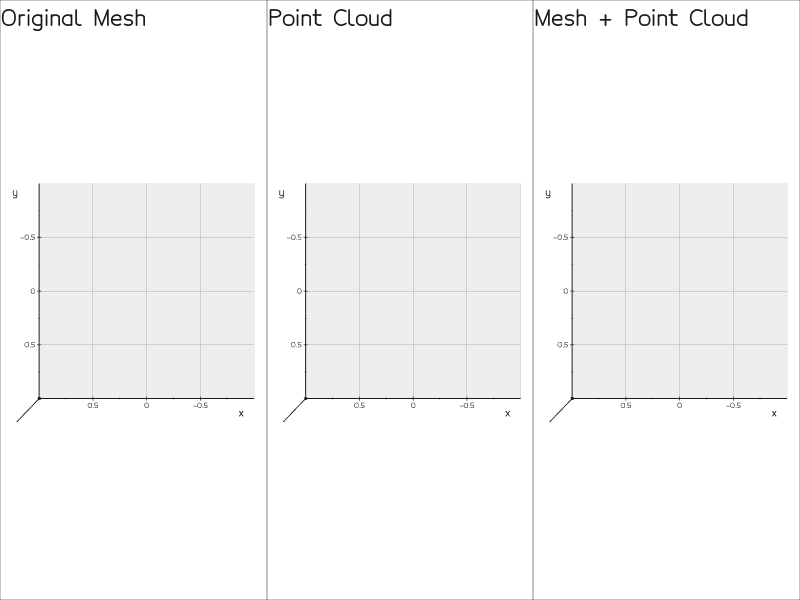

In [12]:
"""Use a variant of the Moving Least Squares (MLS)
algorithm to project a cloud of points to become a smooth surface.
In the second window we show the error estimated for
each point in color scale (left) or in size scale (right)."""
from vedo import *
printc(__doc__, invert=1)

plt1 = Plotter(N=3, axes=1)

mesh = Mesh(r"Q:/sachuriga/star_icosahedron.STL").normalize().subdivide()
pts = mesh.coordinates
point_cloud = Points(pts, r=5, c="blue")

# Add the original mesh to the first subplot (index 0)
plt1.at(0).show(mesh, "Original Mesh")

# Add the point cloud to the second subplot (index 1)
plt1.at(1).show(point_cloud, "Point Cloud")

# Add both mesh and point cloud to the third subplot (index 2)
plt1.at(2).show(mesh, point_cloud, "Mesh + Point Cloud")

# pts += np.random.randn(len(pts), 3)/20  # add noise, will not mess up the original points


# #################################### smooth cloud with MLS
# # build the mesh points
# s0 = Points(pts, r=3).color("blue")
# plt1.at(0).show(s0, "original point cloud + noise")

# # project s1 points into a smooth surface of points
# # The parameter f controls the size of the local regression.
# mls1 = s0.clone().smooth_mls_2d(f=0.5)
# plt1.at(1).show(mls1, "MLS first pass, f=0.5")

# # mls1 is an Assembly so unpack it to get the first object it contains
# mls2 = mls1.clone().smooth_mls_2d(radius=0.1)
# plt1.at(2).show(mls2, "MLS second pass, radius=0.1")

In [17]:
import docopt
import trimesh
import os
import numpy as np
import glob
from vedo import *

from trimesh.sample import sample_surface
mesh = trimesh.load(r'Q:/sachuriga\Documents/Presentations/Kavili_JC/3d/Terry_The_Dragon.stl')
mesh.apply_scale(250/mesh.scale)
points = sample_surface(mesh, 100000)
#points1 -= points[0].mean(axis=0)
point_cloud = Points(points[0], r=5, c="blue")

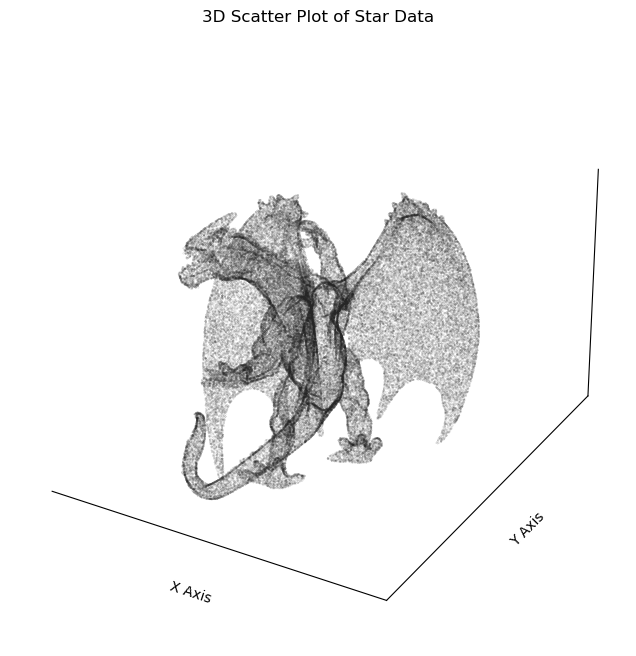

Explained variance ratio (PCA): [0.48271446 0.30338515]


In [19]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap
import umap  # Note: requires 'umap-learn' package

# Assuming 'points[0]' is your 3D array
array_3d = points[0]  # Shape: (n_samples, 3)

# Extract x, y, z for the original 3D plot
x = array_3d[:, 0]
y = array_3d[:, 1]
z = array_3d[:, 2]

# Calculate the range of each axis
x_range = np.max(x) - np.min(x)
y_range = np.max(y) - np.min(y)
z_range = np.max(z) - np.min(z)

# Original 3D Scatter Plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, s=0.01,color=".15", alpha=0.5)
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')
ax.set_aspect('equal')
ax.set_xticks([])  # Hide x-axis ticks
ax.set_yticks([]) 
ax.set_zticks([]) # Hide y-axis ticks
ax.spines['top'].set_visible(False)    # Hide top spine
ax.spines['right'].set_visible(False)  # Hide right spine
# Left and bottom spines (x and y axes) remain visible
ax.set_title('3D Scatter Plot of Star Data')
ax.grid(False)  # Turn off grid
ax.set_facecolor('none')
ax.set_box_aspect([x_range, y_range, z_range])
# Turn off the background panes (the "walls" of the 3D plot)
ax.xaxis.pane.set_visible(False)
ax.yaxis.pane.set_visible(False)
ax.zaxis.pane.set_visible(False)
fig.savefig(fr'Q:\sachuriga\Documents\Presentations\Kavili_JC/20250328/compare PCAs/dragon_cloud.png', format='png', bbox_inches='tight')

plt.show()

# 1. PCA (Principal Component Analysis)
pca = PCA(n_components=2)  # Reduce to 2 dimensions
pca_result = pca.fit_transform(array_3d)
print(f"Explained variance ratio (PCA): {pca.explained_variance_ratio_}")





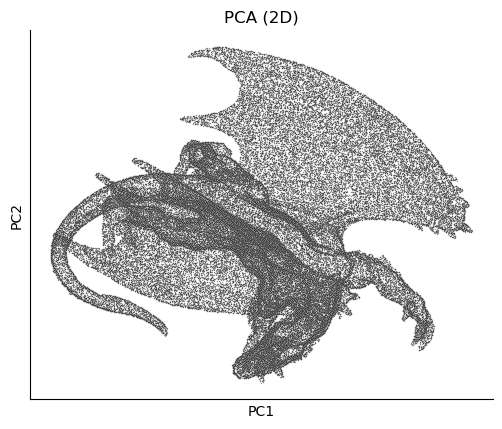

In [ ]:
# Create 2D scatter plots for PCA, t-SNE, and UMAP
fig, axes = plt.subplots()

# PCA Plot
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], ax=axes, s=1, alpha=0.5,color=".15")
#sns.histplot(x=pca_result[:, 0], y=pca_result[:, 1], bins=50, pthresh=.1, cmap="mako")
axes.set_aspect('equal')
axes.set_title('PCA (2D)')
axes.set_xlabel('PC1')
axes.set_ylabel('PC2')
axes.set_xticks([])  # Hide x-axis ticks
axes.set_yticks([])  # Hide y-axis ticks
axes.spines['top'].set_visible(False)    # Hide top spine
axes.spines['right'].set_visible(False)  # Hide right spine
# Left and bottom spines (x and y axes) remain visible
fig.savefig(fr'Q:\sachuriga\Documents\Presentations\Kavili_JC/20250328/compare PCAs/PCA_dragon.png', format='png', bbox_inches='tight')


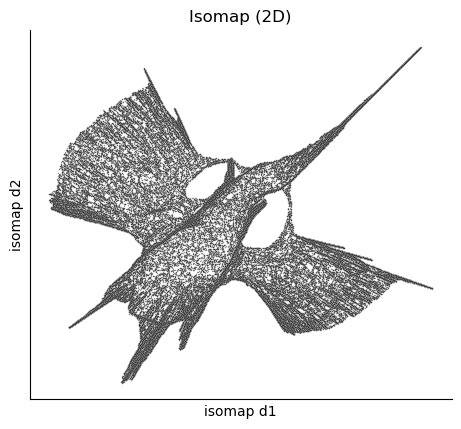

In [23]:
isomap = Isomap(n_components=2, n_neighbors=5)  # n_components=2 for 2D output
data_2d = isomap.fit_transform(array_3d)

fig, axes = plt.subplots()
sns.scatterplot(x=data_2d[:, 0], y=data_2d[:, 1], ax=axes, s=1, alpha=0.5,color=".15")
axes.set_aspect('equal')
axes.set_title('Isomap (2D)')
axes.set_xlabel('isomap d1')
axes.set_ylabel('isomap d2')
axes.set_xticks([])  # Hide x-axis ticks
axes.set_yticks([])  # Hide y-axis ticks
axes.spines['top'].set_visible(False)    # Hide top spine
axes.spines['right'].set_visible(False)  # Hide right spine
# Left and bottom spines (x and y axes) remain visible
fig.savefig(fr'Q:\sachuriga\Documents\Presentations\Kavili_JC/20250328/compare PCAs/Isomap_dragon.png', format='png', bbox_inches='tight')

c:\Users\sachur\AppData\Local\anaconda3\envs\nwb4fp\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


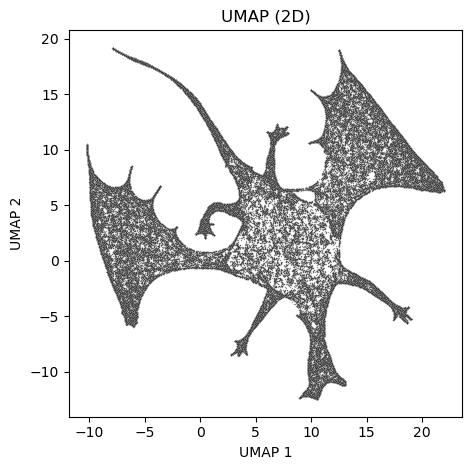

In [ ]:
import umap 
from umap import UMAP
# 3. UMAP (Uniform Manifold Approximation and Projection)
umap_model = UMAP(n_components=2, random_state=None, n_neighbors=1000, n_jobs=-1)
umap_result = umap_model.fit_transform(array_3d)


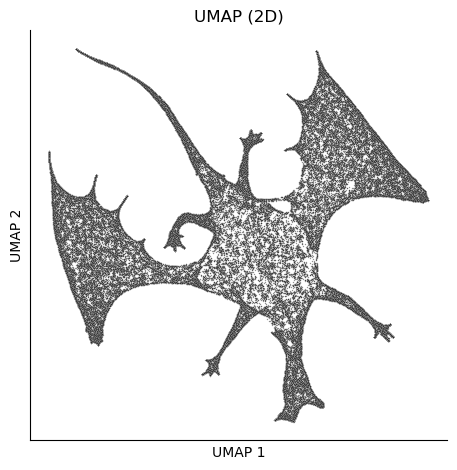

In [24]:
fig, axes = plt.subplots()
# UMAP Plot
sns.scatterplot(x=umap_result[:, 0], y=umap_result[:, 1], ax=axes, s=1, alpha=0.5,color=".15")
axes.set_aspect('equal')
axes.set_title('UMAP (2D)')
axes.set_xlabel('UMAP 1')
axes.set_ylabel('UMAP 2')
axes.set_xticks([])  # Hide x-axis ticks
axes.set_yticks([])  # Hide y-axis ticks
axes.spines['top'].set_visible(False)    # Hide top spine
axes.spines['right'].set_visible(False)  # Hide right spine
plt.tight_layout()

plt.show()

fig.savefig(fr'Q:\sachuriga\Documents\Presentations\Kavili_JC/20250328/compare PCAs/umap_dragon.png', format='png', bbox_inches='tight')